# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [3]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [6]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [7]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [8]:
df_train.shape

(15223, 52)

In [9]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [10]:
df_test.shape

(14910, 52)

In [11]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [12]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [13]:
df = df_test.append(df_train).reset_index(drop=True)

In [14]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [16]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Высшее', 'Среднее специальное', 'Неполное среднее', 'Два и более высших образования', 'Ученая степень', 'Неоконченное высшее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Гражданский брак', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Салоны красоты и здоровья', 'Образование', 'Банк/Финансы', 'Информационные услуги', 'Строительство', 'Информационные технологии', 'Развлечения/Искусство', 'Страхование', 'Государственная служба', 'Наука', 'Коммунальное хоз-во/Дорожные службы', 'Ресторанный бизнес/Общественное питание', 'Недвижимость', 'Химия/Парфюмерия/Фармацевтика', 'Другие сферы', 'Сборочные производства', 'Торговля', 'Энергетика', 'Транспорт', 'Сельское хозяйство', 'Управляющая компания', 'Логистика', 'Здравоохранение', 'СМИ/Реклама/PR-агенства', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Подбор персонала', 'Маркетинг', 'Нефтегазовая промышленность', 'Туризм', 'Металлургия/Промышленность/Машиностроение'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
1. GEN_TITLE - есть значения nan. Безработные или профессия не указана?
ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR - та же проблема
2. REGION_NM - то же есть nan, то ли человек за границей живёт то ли не указал где

Нужно или заменить nan в каждом столбце на отдельные значения, или попытаться понять где 
незаполненное значение а где человек не работает. Например если человек пенсионер и у него 
небольшой вклад/задолженность, то следует заполнить как пенсионера.
Оставшиеся значения nan или заменить на 'Неизвестно' или как вариант просто удалить такие строчки из
анализируемого датасета. Можно проанализировать их отдельно и если для таких строчек сильно 
превалирует согласие/несогласие клиента, то классифицировать таких клиентов отдельно.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
Категориальных признаков много: SOCSTATUS_WORK_FL, SOCSTATUS_PENS_FL, GENDER (условно так как закодирован чмслом),
различные адреса, наличие/отсутствие различных факторов (хотя часть из них кодируется числами) и прочее.
Нужно соответственно использовать методы обучения которые предусматривают категориальные признаки,
или же перекодировать их в числа.

    
    

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [18]:
#создаём словари кодирования категорий
#dict_EDUCATION = {'Неполное среднее': 1, 'Среднее специальное': 2, 'Неоконченное высшее': 3, 'Высшее': 4, 'Два и более высших образования': 5, 'Ученая степень': 6, 'Среднее': 7}
#dict_MARITAL_STATUS = {'Не состоял в браке': 1, 'Гражданский брак': 2, 'Состою в браке': 3, 'Разведен(а)': 4, 'Вдовец/Вдова': 5}
#dict_GEN_INDUSTRY = {'Сельское хозяйство': 1, nan: 2, 'Развлечения/Искусство': 3, 'Недвижимость': 4, 'Наука': 5, 'Энергетика': 6, 'Нефтегазовая промышленность': 7, 'Маркетинг': 8, 'Управляющая компания': 9, 'Государственная служба': 10, 'Салоны красоты и здоровья': 11, 'Туризм': 12, 'Сборочные производства': 13, 'Другие сферы': 14, 'Здравоохранение': 15, 'Коммунальное хоз-во/Дорожные службы': 16, 'Юридические услуги/нотариальные услуги': 17, 'Строительство': 18, 'ЧОП/Детективная д-ть': 19, 'Логистика': 20, 'Ресторанный бизнес/Общественное питание': 21, 'Транспорт': 22, 'Информационные услуги': 23, 'СМИ/Реклама/PR-агенства': 24, 'Торговля': 25, 'Подбор персонала': 26, 'Банк/Финансы': 27, 'Образование': 28, 'Металлургия/Промышленность/Машиностроение': 29, 'Страхование': 30, 'Химия/Парфюмерия/Фармацевтика': 31, 'Информационные технологии': 32}

# что-то их многовато

def dict_from_col_name(nam):
    init_set = set(df[nam])
    return_dc = dict()
    i = 1;
    for el in init_set:
        return_dc[el] = i
        i += 1
    return return_dc

dict_EDUCATION = dict_from_col_name('EDUCATION') 
print(dict_EDUCATION)



{'Среднее': 1, 'Высшее': 2, 'Среднее специальное': 3, 'Неполное среднее': 4, 'Два и более высших образования': 5, 'Ученая степень': 6, 'Неоконченное высшее': 7}


In [19]:
def col_refill(dt_frame,nam):
    values_dict = dict_from_col_name(nam)
    dt_frame[nam] = dt_frame[nam].map(lambda x: values_dict[x])


In [20]:
df_output = df.copy()
col_refill(df_output,'EDUCATION')
df_output.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,3,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,1,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,1,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,1,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,2,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


In [21]:
import math

def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    del df_output['AGREEMENT_RK']
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float32')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float32')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float32')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float32')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float32')
    
    col_refill(df_output,'EDUCATION')
    col_refill(df_output,'MARITAL_STATUS')
    col_refill(df_output,'GEN_INDUSTRY')
    col_refill(df_output,'GEN_TITLE')
    col_refill(df_output,'ORG_TP_STATE')
    col_refill(df_output,'ORG_TP_FCAPITAL')
    col_refill(df_output,'JOB_DIR')
    col_refill(df_output,'FAMILY_INCOME')
    col_refill(df_output,'REG_ADDRESS_PROVINCE')
    col_refill(df_output,'FACT_ADDRESS_PROVINCE')
    col_refill(df_output,'POSTAL_ADDRESS_PROVINCE')
    col_refill(df_output,'TP_PROVINCE')
    col_refill(df_output,'REGION_NM')

    #PREVIOUS_CARD_NUM_UTILIZED
    # сам номер скорее всего не нужен
    # пускай будет 0 если NaN и 1 если не NaN
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].map(lambda x: np.float32(0) if math.isnan(x) else np.float32(x))
    
    #df_output['WORK_TIME'] = df_output['WORK_TIME'].map(lambda x: 0 if x is None else x)
    
    
    #float64 не пролезает в decisiontree
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].astype('float32') 
    df_output['WORK_TIME'] = df_output['WORK_TIME'].astype('float32')
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(0)

    return df_output


        
    

In [22]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [23]:
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Data columns (total 51 columns):
TARGET                        14910 non-null int64
AGE                           14910 non-null int64
SOCSTATUS_WORK_FL             14910 non-null int64
SOCSTATUS_PENS_FL             14910 non-null int64
GENDER                        14910 non-null int64
CHILD_TOTAL                   14910 non-null int64
DEPENDANTS                    14910 non-null int64
EDUCATION                     14910 non-null int64
MARITAL_STATUS                14910 non-null int64
GEN_INDUSTRY                  14910 non-null int64
GEN_TITLE                     14910 non-null int64
ORG_TP_STATE                  14910 non-null int64
ORG_TP_FCAPITAL               14910 non-null int64
JOB_DIR                       14910 non-null int64
FAMILY_INCOME                 14910 non-null int64
PERSONAL_INCOME               14910 non-null float32
REG_ADDRESS_PROVINCE          14910 non-null int64
FACT_ADDRESS_PROVINCE 

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [24]:
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

X = df_train_preproc.copy()
X_test = df_test_preproc.copy()
del X['TARGET']
del X_test['TARGET']

In [25]:
X_test

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,30,1,0,1,1,1,3,5,3,6,...,0,1,2,2,8,0,0,0.000000,0.000000,0.0
1,48,0,1,1,0,0,1,2,1,1,...,0,0,2,1,15,0,0,0.000000,0.000000,0.0
2,35,1,0,0,1,0,1,5,32,6,...,0,1,1,1,1,0,0,0.000000,0.000000,0.0
3,22,1,0,0,0,0,1,5,16,6,...,0,1,3,2,9,0,0,0.000000,0.000000,0.0
4,27,1,0,1,2,2,2,2,3,6,...,0,1,1,1,5,0,0,0.000000,0.000000,0.0
5,44,0,1,0,2,2,3,2,1,1,...,0,0,1,1,5,0,0,0.000000,0.000000,0.0
6,57,1,0,1,0,0,1,5,17,6,...,0,1,3,3,14,0,0,0.000000,0.000000,0.0
7,33,1,0,1,2,2,3,3,3,6,...,0,1,1,1,5,0,0,0.000000,0.000000,0.0
8,53,0,1,1,2,0,3,2,1,1,...,0,0,1,1,4,0,0,0.000000,0.000000,0.0
9,33,1,0,0,1,0,4,2,18,2,...,0,1,1,1,6,0,0,0.000000,0.000000,0.0


#### Задание 5. Обучение и оценка качества разных моделей

In [26]:
#from sklearn.cross_validation import train_test_split
    # странный код и ноутбук выдаёт по нему предупреждение об устаревании
    # библиотеку cross_validation меняю на model_selection чтобы не ломать шаблон

# test_size=0.3, random_state=42

## Your Code Here
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

## Your Code Here

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

modelDecisionTree = DecisionTreeClassifier()
#X_training['TARGET']
#X_training.info()
#X_training[pd.isnan(X_training['WORK_TIME'])]

#X_training.info()
modelDecisionTree.fit(X_training, Y_training)
train_predictionsDecisionTree = modelDecisionTree.predict(X_training)
control_predictionsDecisionTree = modelDecisionTree.predict(X_testing)

modelLogisticRegression = LogisticRegression()
modelLogisticRegression.fit(X_training, Y_training)
                            
modelRandomForestClassifier = RandomForestClassifier()
modelRandomForestClassifier.fit(X_training, Y_training)                            

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
train_predictionsDecisionTree = modelDecisionTree.predict(X_training)
test_predictionsDecisionTree = modelDecisionTree.predict(X_testing)

train_predictionsLogisticRegression = modelLogisticRegression.predict(X_training)
test_predictionsLogisticRegression = modelLogisticRegression.predict(X_testing)

train_predictionsRandomForestClassifier = modelRandomForestClassifier.predict(X_training)
test_predictionsRandomForestClassifier = modelRandomForestClassifier.predict(X_testing)

#DecisionTree
print('DecisionTree')
accuracy_score_trainDecisionTree = accuracy_score(train_predictionsDecisionTree,Y_training)
print('accuracy_score_trainDecisionTree',accuracy_score_trainDecisionTree)
accuracy_score_testDecisionTree = accuracy_score(test_predictionsDecisionTree,Y_testing)
print('accuracy_score_testDecisionTree',accuracy_score_testDecisionTree)

precision_score_trainDecisionTree = precision_score(train_predictionsDecisionTree,Y_training)
print('precision_score_trainDecisionTree',precision_score_trainDecisionTree)
precision_score_testDecisionTree = precision_score(test_predictionsDecisionTree,Y_testing)
print('precision_score_testDecisionTree',precision_score_testDecisionTree)

recall_score_trainDecisionTree = recall_score(train_predictionsDecisionTree,Y_training)
print('recall_score_trainDecisionTree',recall_score_trainDecisionTree)
recall_score_testDecisionTree = recall_score(test_predictionsDecisionTree,Y_testing)
print('recall_score_testDecisionTree',recall_score_testDecisionTree)
print()

#LogisticRegression
print('LogisticRegression')
accuracy_score_trainLogisticRegression = accuracy_score(train_predictionsLogisticRegression,Y_training)
print('accuracy_score_trainLogisticRegression',accuracy_score_trainLogisticRegression)
accuracy_score_testLogisticRegression = accuracy_score(test_predictionsLogisticRegression,Y_testing)
print('accuracy_score_testLogisticRegression',accuracy_score_testLogisticRegression)

precision_score_trainLogisticRegression = precision_score(train_predictionsLogisticRegression,Y_training)
print('precision_score_trainLogisticRegression',precision_score_trainLogisticRegression)
precision_score_testLogisticRegression = precision_score(test_predictionsLogisticRegression,Y_testing)
print('precision_score_testLogisticRegression',precision_score_testLogisticRegression)

recall_score_trainLogisticRegression = recall_score(train_predictionsLogisticRegression,Y_training)
print('recall_score_trainLogisticRegression',recall_score_trainLogisticRegression)
recall_score_testLogisticRegression = recall_score(test_predictionsLogisticRegression,Y_testing)
print('recall_score_testLogisticRegression',recall_score_testLogisticRegression)
print()

#RandomForestClassifier
print('RandomForestClassifier')
accuracy_score_trainRandomForestClassifier = accuracy_score(train_predictionsRandomForestClassifier,Y_training)
print('accuracy_score_trainRandomForestClassifier',accuracy_score_trainRandomForestClassifier)
accuracy_score_testRandomForestClassifier = accuracy_score(test_predictionsRandomForestClassifier,Y_testing)
print('accuracy_score_testRandomForestClassifier',accuracy_score_testRandomForestClassifier)

precision_score_trainRandomForestClassifier = precision_score(train_predictionsRandomForestClassifier,Y_training)
print('precision_score_trainRandomForestClassifier',precision_score_trainRandomForestClassifier)
precision_score_testRandomForestClassifier = precision_score(test_predictionsRandomForestClassifier,Y_testing)
print('precision_score_testRandomForestClassifier',precision_score_testRandomForestClassifier)

recall_score_trainRandomForestClassifier = recall_score(train_predictionsRandomForestClassifier,Y_training)
print('recall_score_trainRandomForestClassifier',recall_score_trainRandomForestClassifier)
recall_score_testRandomForestClassifier = recall_score(test_predictionsRandomForestClassifier,Y_testing)
print('recall_score_testRandomForestClassifier',recall_score_testRandomForestClassifier)

#train_scoreDecisionTree = accuracy_score(X_training, Y_training, normalize=True)
#control_scoreDecisionTree = accuracy_score(X_testing, Y_testing, normalize=True)

DecisionTree
accuracy_score_trainDecisionTree 1.0
accuracy_score_testDecisionTree 0.7893584409897088
precision_score_trainDecisionTree 1.0
precision_score_testDecisionTree 0.2036036036036036
recall_score_trainDecisionTree 1.0
recall_score_testDecisionTree 0.17851500789889416

LogisticRegression
accuracy_score_trainLogisticRegression 0.8816629129129129
accuracy_score_testLogisticRegression 0.8776001751696957
precision_score_trainLogisticRegression 0.00477326968973747
precision_score_testLogisticRegression 0.0018018018018018018
recall_score_trainLogisticRegression 0.375
recall_score_testLogisticRegression 0.16666666666666666

RandomForestClassifier
accuracy_score_trainRandomForestClassifier 0.9803866366366366
accuracy_score_testRandomForestClassifier 0.8769432888110357
precision_score_trainRandomForestClassifier 0.8337311058074781
precision_score_testRandomForestClassifier 0.018018018018018018
recall_score_trainRandomForestClassifier 1.0
recall_score_testRandomForestClassifier 0.37037037

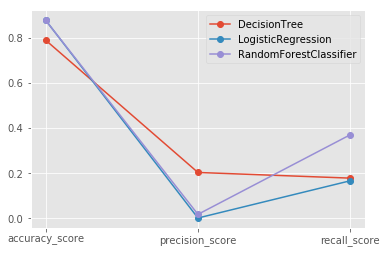

In [51]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
import matplotlib.pyplot as plt
import seaborn as sns


results_dic = {'names': ['DecisionTree','LogisticRegression','RandomForestClassifier'], 'accuracy_score': [accuracy_score_testDecisionTree,accuracy_score_testLogisticRegression,accuracy_score_testRandomForestClassifier],'precision_score':[precision_score_testDecisionTree,precision_score_testLogisticRegression,precision_score_testRandomForestClassifier],'recall_score':[recall_score_testDecisionTree,recall_score_testLogisticRegression,recall_score_testRandomForestClassifier]}
df_graph = pd.DataFrame(data=results_dic)

#data_plt = sns.loaddataset 
#g = sns.factorplot("names", "accuracy_score", "precision_score", "recall_score", data=df_graph, kind="bar", palette="muted", legend=False)
#plt.show()
#df_graph

#df_graph['accuracy_score'].hist(x="names", alpha=0.6, label="accuracy")
#df_graph[['names','accuracy_score']].hist()

#g = sns.factorplot("names", "accuracy_score", data=df_graph, kind="bar", palette="muted", legend=False)
#e = sns.factorplot("names", "precision_score", data=df_graph, kind="bar", palette="muted", legend=False)
#z = sns.factorplot("names", "recall_score", data=df_graph, kind="bar", palette="muted", legend=False)


names = ["accuracy_score","precision_score","recall_score"]
dataDecisionTree = [accuracy_score_testDecisionTree,precision_score_testDecisionTree,recall_score_testDecisionTree]
dataLogisticRegression = [accuracy_score_testLogisticRegression,precision_score_testLogisticRegression,recall_score_testLogisticRegression]
dataRandomForestClassifier = [accuracy_score_testRandomForestClassifier,precision_score_testRandomForestClassifier,recall_score_testRandomForestClassifier]

plt.plot(names, dataDecisionTree, label="DecisionTree", marker='o')
plt.plot(names, dataLogisticRegression, label="LogisticRegression", marker='o')
plt.plot(names, dataRandomForestClassifier, label="RandomForestClassifier", marker='o')
plt.legend()

# не знаю как оставить точки но убрать линии
plt.show()

Text(0.5,0,'Полнота')

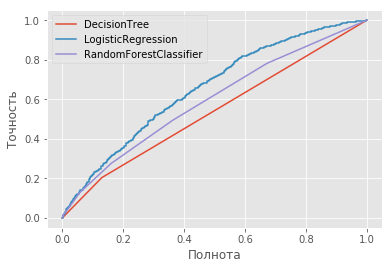

In [33]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
#model.predict_proba(data)

from sklearn.metrics import roc_curve

test_predictionsDecisionTreeProba = modelDecisionTree.predict_proba(X_testing)[:,1]
test_predictionsLogisticRegressionProba = modelLogisticRegression.predict_proba(X_testing)[:,1]
test_predictionsRandomForestClassifierProba = modelRandomForestClassifier.predict_proba(X_testing)[:,1]

fprDecisionTree, tprDecisionTree, thresholdDecisionTree = roc_curve(Y_testing,test_predictionsDecisionTreeProba)
fprLogisticRegression, tprLogisticRegression, thresholdLogisticRegression = roc_curve(Y_testing,test_predictionsLogisticRegressionProba)
fprRandomForestClassifier, tprRandomForestClassifier, thresholdRandomForestClassifier = roc_curve(Y_testing,test_predictionsRandomForestClassifierProba)

plt.plot(fprDecisionTree, tprDecisionTree, label="DecisionTree")
plt.plot(fprLogisticRegression, tprLogisticRegression, label="LogisticRegression")
plt.plot(fprRandomForestClassifier, tprRandomForestClassifier, label="RandomForestClassifier")
plt.legend()
plt.ylabel('Точность')
plt.xlabel('Полнота')



In [41]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
from sklearn.model_selection import KFold
split_num = 10
kfold = KFold(n_splits=split_num, random_state=777)

# ? https://stackoverflow.com/questions/33642158/what-is-the-difference-between-cross-val-score-with-scoring-roc-auc-and-roc-au
# ? roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

results_DecisionTree = cross_val_score(modelDecisionTree,X_training,Y_training,cv=kfold,scoring='roc_auc')
average_rocauc_DecisionTree = sum(results_DecisionTree)/split_num
print('average_rocauc_DecisionTree',average_rocauc_DecisionTree)

results_LogisticRegression = cross_val_score(modelLogisticRegression,X_training,Y_training,cv=kfold,scoring='roc_auc')
average_rocauc_LogisticRegression = sum(results_LogisticRegression)/split_num
print('average_rocauc_LogisticRegression',average_rocauc_LogisticRegression)

results_RandomForestClassifier = cross_val_score(modelRandomForestClassifier,X_training,Y_training,cv=kfold,scoring='roc_auc')
average_rocauc_RandomForestClassifier = sum(results_RandomForestClassifier)/split_num
print('average_rocauc_RandomForestClassifier',average_rocauc_RandomForestClassifier)

#train_predictionsLogisticRegression = modelLogisticRegression.predict(X_training)


#train_predictionsRandomForestClassifier = modelRandomForestClassifier.predict(X_training)


average_rocauc_DecisionTree 0.5279527647848088
average_rocauc_LogisticRegression 0.6416921962428725
average_rocauc_RandomForestClassifier 0.6001639857746056


In [34]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

#predict = 
## Your Code Here
# лучший rocauc оказался у LogisticRegression
predict = modelLogisticRegression.predict_proba(X_test)[:,1]

predict
#test_predictionsLogisticRegression = modelLogisticRegression.predict(X_testing)

#X_test
#2 вектора: y и y_test

array([0.12020605, 0.08377993, 0.19182054, ..., 0.16409541, 0.06460511,
       0.16513737])

rocauc 0.6326620060790273


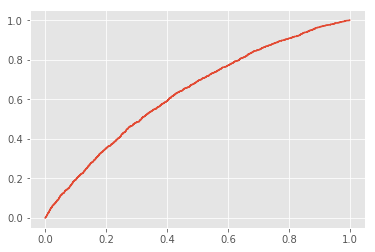

In [42]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
fprLogisticRegressionFin, tprLogisticRegressionFin, thresholdLogisticRegressionFin = roc_curve(y_test,predict)

#sch = len(fprLogisticRegressionFin)
#for i in range(sch):
#    print(i+1,':',tprLogisticRegressionFin[i],fprLogisticRegressionFin[i])
from sklearn import  metrics
rocauc = metrics.roc_auc_score(y_test, predict)
print('rocauc',rocauc)

plt.plot(fprLogisticRegressionFin, tprLogisticRegressionFin)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)